In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from PIL import Image

Import data and customize

In [28]:
"""
This code processes multiple images, converts them to grayscale, flattens them into 1D vectors, and creates a training dataset with corresponding labels.

"""
image_arr = []  # Create an empty list to store processed image tensors.
number_of_images = 3  # Define the number of images to process.

for i in range(1, number_of_images+1):
    img = Image.open(f'Q5_{i}.png')  # Open an image file.
    transform = transforms.Grayscale()  # Convert the image to grayscale.
    img = transform(img)
    transform = transforms.ToTensor()  # Convert the image to a PyTorch tensor.
    tensor = transform(img)
    tensor = torch.flatten(tensor)  # Flatten the tensor to a 1D vector.
    image_arr.append(tensor)

x_train = torch.stack(image_arr)  # Stack the processed tensors to create the training data.
y_train = torch.tensor([0, 1, 2], dtype=torch.long)  # Create labels for the training data.

Create a neural network model

In [29]:
"""
Create a neural network model using PyTorch's Sequential module.

"""

d = 26  # Define the hidden layer size for the neural network.
model = nn.Sequential(
    nn.LayerNorm(236032),  # Apply Layer Normalization to input data.
    nn.Linear(236032, d),  # Create a linear (fully connected) layer with 236032 input and 'd' output neurons.
    nn.Tanh(),  # Apply the Tanh activation function.
    nn.Linear(d, 3),  # Create a linear layer with 'd' input and 3 output neurons.
    nn.Softmax(dim=0)  # Apply softmax activation along dimension 0.
)

print(model)

Sequential(
  (0): LayerNorm((236032,), eps=1e-05, elementwise_affine=True)
  (1): Linear(in_features=236032, out_features=26, bias=True)
  (2): Tanh()
  (3): Linear(in_features=26, out_features=3, bias=True)
  (4): Softmax(dim=0)
)


Computation Loss and Optimization

In [30]:
loss_fn = nn.CrossEntropyLoss()  # Define the loss function (cross-entropy) for classification.
optimizer = optim.Adam(model.parameters(), lr=0.4)  # Define the optimizer (Adam) for training the model.

Loop through the training epochs

Finished epoch 0, latest loss 1.1001224517822266
Finished epoch 10, latest loss 0.5514512658119202
Finished epoch 20, latest loss 0.5514447689056396
Finished epoch 30, latest loss 0.5514446496963501
Finished epoch 40, latest loss 0.5514446496963501
Finished epoch 50, latest loss 0.5514446496963501
Finished epoch 60, latest loss 0.5514446496963501
Finished epoch 70, latest loss 0.5514446496963501
Finished epoch 80, latest loss 0.5514446496963501
Finished epoch 90, latest loss 0.5514446496963501
Finished epoch 100, latest loss 0.5514446496963501
Finished epoch 110, latest loss 0.5514446496963501
Finished epoch 120, latest loss 0.5514446496963501
Finished epoch 130, latest loss 0.5514446496963501
Finished epoch 140, latest loss 0.5514446496963501
Finished epoch 150, latest loss 0.5514446496963501
Finished epoch 160, latest loss 0.5514446496963501
Finished epoch 170, latest loss 0.5514446496963501
Finished epoch 180, latest loss 0.5514446496963501
Finished epoch 190, latest loss 0.55144464

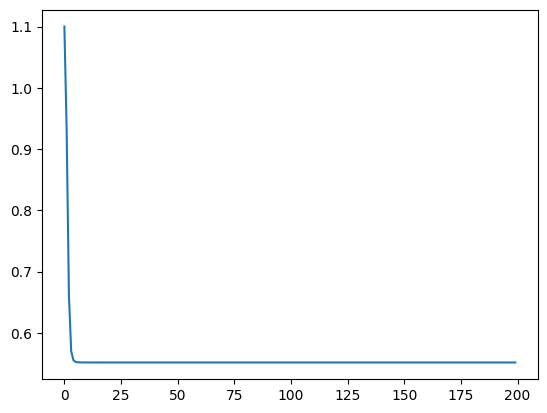

In [31]:
"""
This code performs training for a specified number of epochs (200) on a model using a given dataset. It computes the loss, updates the model parameters using an optimizer, and stores the loss values in a list. The loss values are then plotted against the training epochs.

"""

n_epochs = 200
losses = []  # Create an empty list to store the loss values during training.

for epoch in range(n_epochs):
    Xbatch = x_train  # Get the input data.
    y_pred = model(Xbatch)  # Make predictions using the model.
    ybatch = y_train  # Get the actual labels.
    loss = loss_fn(y_pred, ybatch)  # Calculate the loss.
    losses.append(loss.item())  # Append the loss to the list.
    optimizer.zero_grad()  # Zero the gradients.
    loss.backward()  # Compute gradients via backpropagation.
    optimizer.step()  # Update model parameters using the optimizer.
    if (epoch % 10 == 0):
        print(f'Finished epoch {epoch}, latest loss {loss}')

# Plot the loss values over training epochs.
plt.plot(range(n_epochs), losses)

Calculate and print accuracy

In [32]:
"""
Calculate and print accuracy by comparing predicted labels to true labels.

"""

with torch.no_grad():
    y_pred = model(x_train)  # Get predictions for the training data.
    labels = [torch.argmax(a).item() for a in y_pred]  # Get predicted class labels.

accuracy = [labels[i] == y_train[i] for i in range(3)]
print(f"Accuracy {accuracy}")

Accuracy [tensor(True), tensor(True), tensor(True)]
